# BIRD identification model

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from keras.preprocessing import image  
from tensorflow.keras import layers

Using TensorFlow backend.


In [32]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Transform images

In [80]:
IMAGE_RES = 224                                                                 # input dimensions required by the CNN model
def preprocess_image_to_tensor(img_path, ax):
    img = image.load_img(img_path, target_size=(IMAGE_RES, IMAGE_RES))          # loads RGB image as PIL.Image.Image type, resize image to model input dimensions
    ax.imshow(img, alpha=1)
    x = image.img_to_array(img)/255.0                                           # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3) and normalize to [0:1] as per model requierements
    x = np.expand_dims(x, axis=0)                                               # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return x                                                                    # return 4D tensor

## Load and assemble pretrained model

https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1

In [34]:
URL = 'https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1'               # Import pre-trained bird classification model from Tensorflow Hub 
bird = hub.KerasLayer(URL, input_shape=(IMAGE_RES,IMAGE_RES,3))                 # Using aiy/vision/classifier/birds_V1 classifying 964 bird species from images. It is based on MobileNet, and trained on photos contributed by the iNaturalist community
bird.trainable=False                                                            # freeze model weights

In [35]:
model=tf.keras.Sequential([bird])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 965)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


## Load labels

In [24]:
#from google.colab import drive
#drive.mount('/content/drive')
#!ls "/content/drive/My Drive/Colab Notebooks"

In [81]:
#labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/aiy_birds_V1_labelmap.csv", sep=',', header=0, index_col=0)  # using scientific names  in Latin
labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/labels_oiseaux.csv", sep=';', header=0, index_col=0)          # file providing species in french, english and latin
labels.head()

,nom,name
id,,
964,Pas d'oiseau identifié,background
0,Roselin de Cassin,Cassin's Finch
1,Courlan brun,Limpkin
2,Rupornis magnirostris,Rupornis magnirostris
3,Geai bleu,Blue Jay


## Run prediction

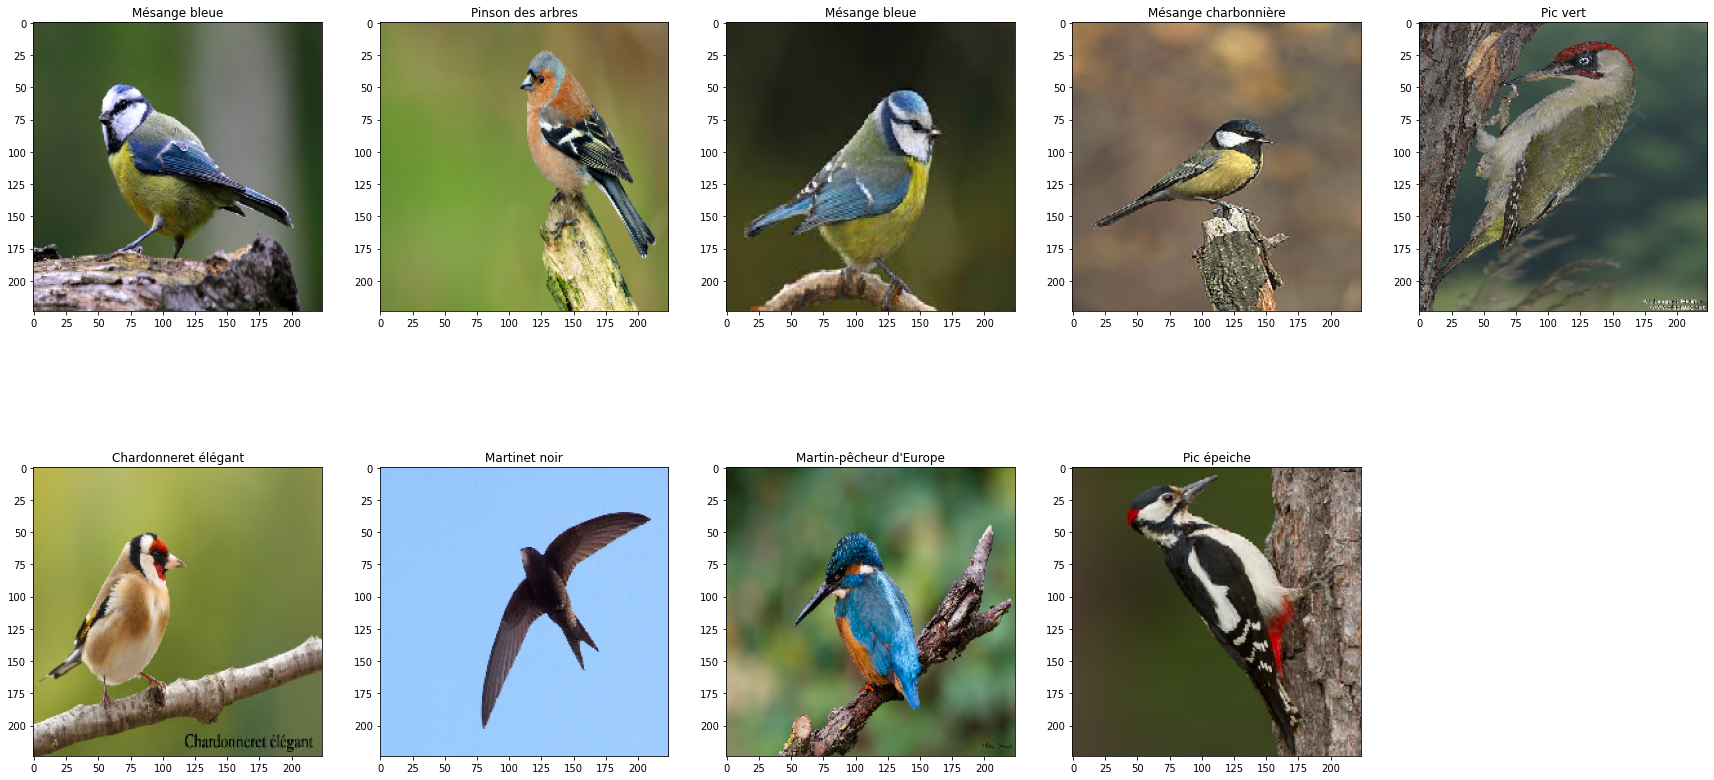

In [86]:
lang='fr'                                                                       # select 'fr' for species in french, 'en' for english labels
if lang=='fr':
  label='nom'
else:
  label='name'

my_files = np.array(glob("/content/drive/My Drive/Colab Notebooks/images/*"))   # collect all images to be analyzed
num_img=my_files.shape[0]
lines= num_img//5 + 1
columns=np.minimum(5,num_img)
plt.figure(figsize=(30,15))
for index, file in enumerate(my_files):
  ax=plt.subplot(lines, columns,index+1)
  processed_image=preprocess_image_to_tensor(file, ax)                          # preprocess image before feeding to classifier
  output = model.predict(processed_image)                                       # get prediction
  prediction = np.argmax(tf.squeeze(output).numpy())
  plt.title(labels[label][prediction])
plt.show()